# 최소제곱법
- 잔차(Residual, Error) 제곱의 합이 최소가 되도록 가중치(𝑊𝑒𝑖𝑔ℎ𝑡)와 편향(𝑏𝑖𝑎𝑠)을 찾음 
    - 잔차 : 예측 값과 실제 값의 차이

- 잔차 제곱의 합(Residual Sum of Squares)이 최소가 되는 가중치와 편향은 편미분을 통해 도출

- 장점
     - 간단하게 식을 유도할 수 있음
- 단점
     - 데이터가 많아지면 계산량이 매우 많이 증가
     - 데이터에 이상치가 있는 경우 성능 하락

In [1]:
# Numpy Array 형식의 데이터 세트를 생성 
# 공부시간(Hour, 특성)을 입력하면 시험 점수(Score, 레이블)를 예측
import numpy as np
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30, 40])

Text(0.5, 1.0, 'With Outlier')

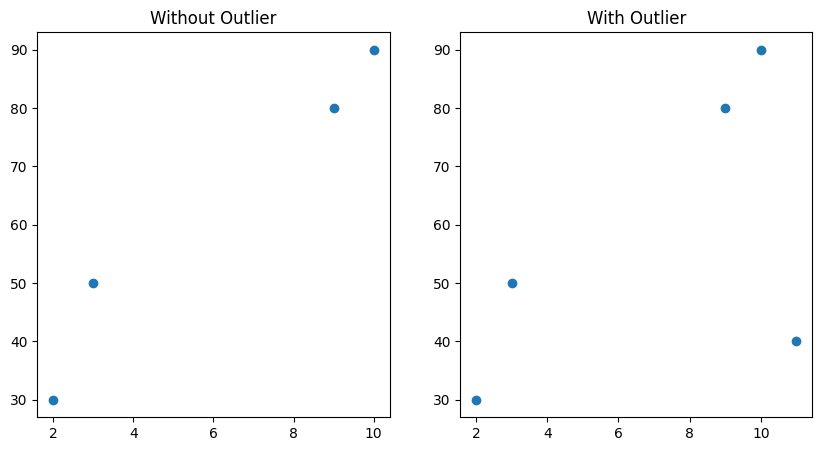

In [2]:
# Matplotlib를 이용하여 원본 데이터를 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')

In [3]:
# Ordinary Least Square 함수 구현
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [4]:
# w, b 계산
w1, b1 = OLS(x1, y1)
w1, b1

(6.6, 22.900000000000006)

In [5]:
# w, b 계산
w2, b2 = OLS(x2, y2)
w2, b2

(3.4285714285714284, 34.0)

In [6]:
# 값 예측 (회귀식 작성)
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

Text(0.5, 1.0, 'With Outlier')

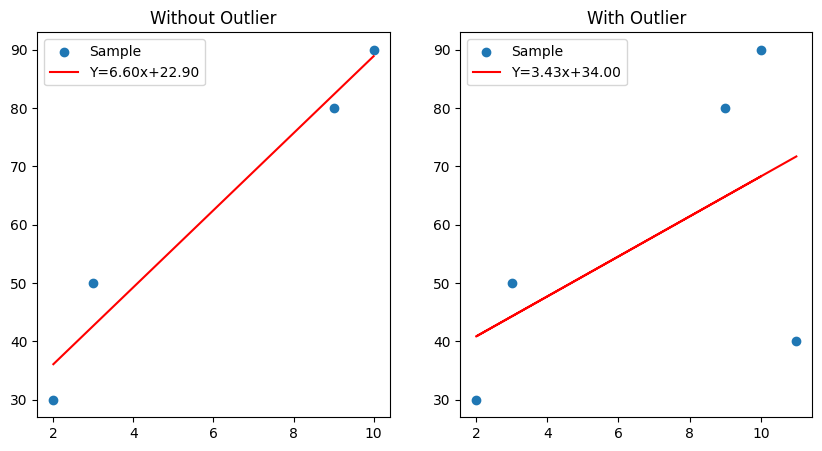

In [7]:
# 회귀선 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.legend()
plt.title('With Outlier')

In [9]:
# 최소 제곱법을 구현한 LinearRegression 클래스 (sklearn의 X는 2차원이어야 한다.)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x1.reshape(-1, 1), y1) # 그래서 1개의 컬럼을 가지는 2차원으로 reshape한다.
print(x1)
print(x1.reshape(-1, 1))
model1.coef_, model1.intercept_ # w와 b값을 확인

[10  9  3  2]
[[10]
 [ 9]
 [ 3]
 [ 2]]


(array([6.6]), 22.899999999999977)

In [10]:
# 최소 제곱법을 구현한 LinearRegression 클래스
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

# 최소제곱법 실습

In [12]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression

In [13]:
# 회귀 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/diabetes.csv') # 당뇨 데이터셋
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [14]:
# 컬럼별 결측치 조회
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [15]:
# 컬럼별 데이터 타입 조회
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [16]:
# 컬럼별 데이터 개수 및 타입 조회 (442개로 모두 일치, 결측치가 없음을 알 수 있으며 모두 실수! )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [17]:
# 특성간 상관 관계 확인 (독립성, 다중공선성)
# 다중공선성? -> 회귀모델의 독립성이 위반되어서 발생하는 문제 (선형 모델에서 주로 발생하는 이슈)
# 독립성? -> 특성 간의 상관관계가 없음 -> 이것을 지켜줘야 한다.
# 특성 간의 상관관계가 0.9이상이 없어야 한다!
# 해결법? -> 둘 중 하나의 컬럼만 놔두든지, 두 컬럼을 합치든지
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


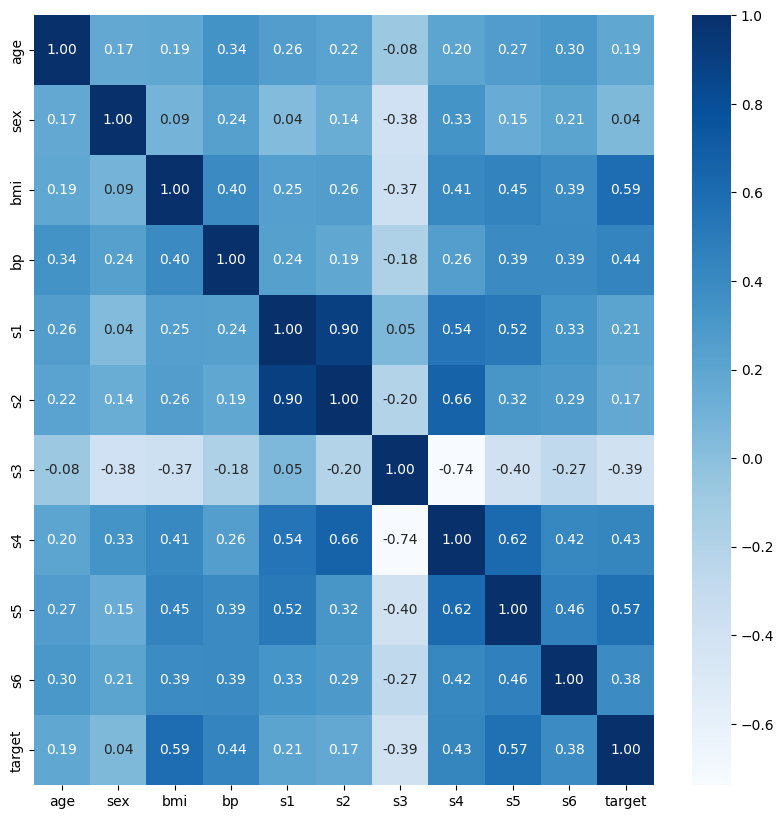

In [18]:
# 특성간 상관 관계 시각화 (독립성, 다중공선성)
  # 특성간의 상관관계가 없어야함 > 독립성
  # 특성간 상관관계가 0.9 이상인 경우 문제가 발생할 수 있음 > 다중공선성 (성능과 관계된 문제는 아님, 신뢰도 문제! 비례, 반비례 관계에 대한 신뢰도를 떨어뜨릴 수 있다.)
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='Blues')
plt.show()

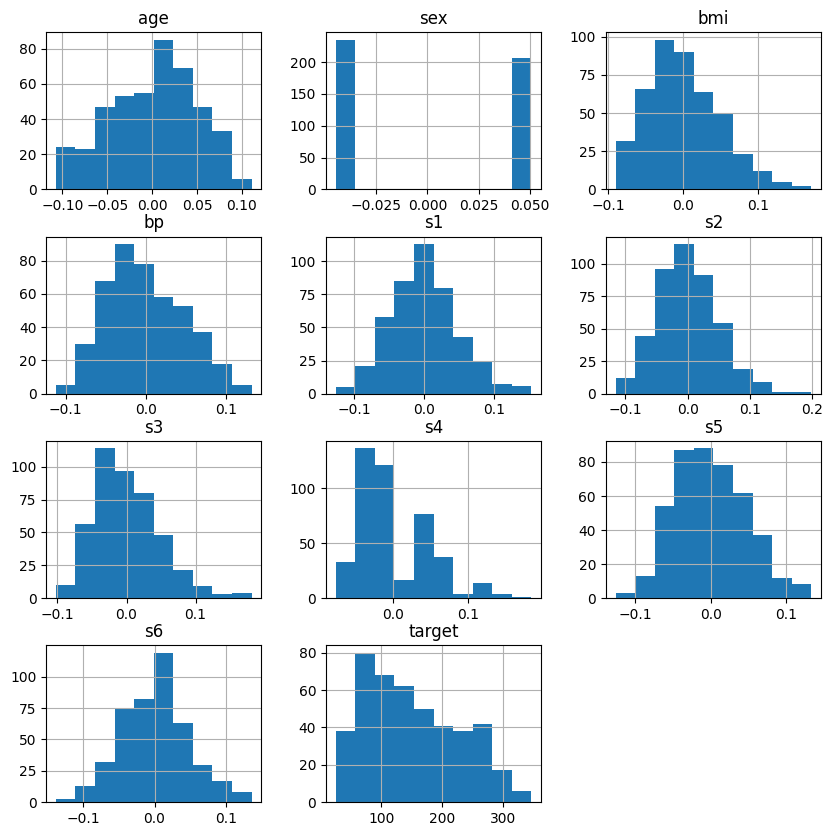

In [19]:
# 컬럼별 분포 확인
df.hist(figsize=(10, 10))
plt.show()

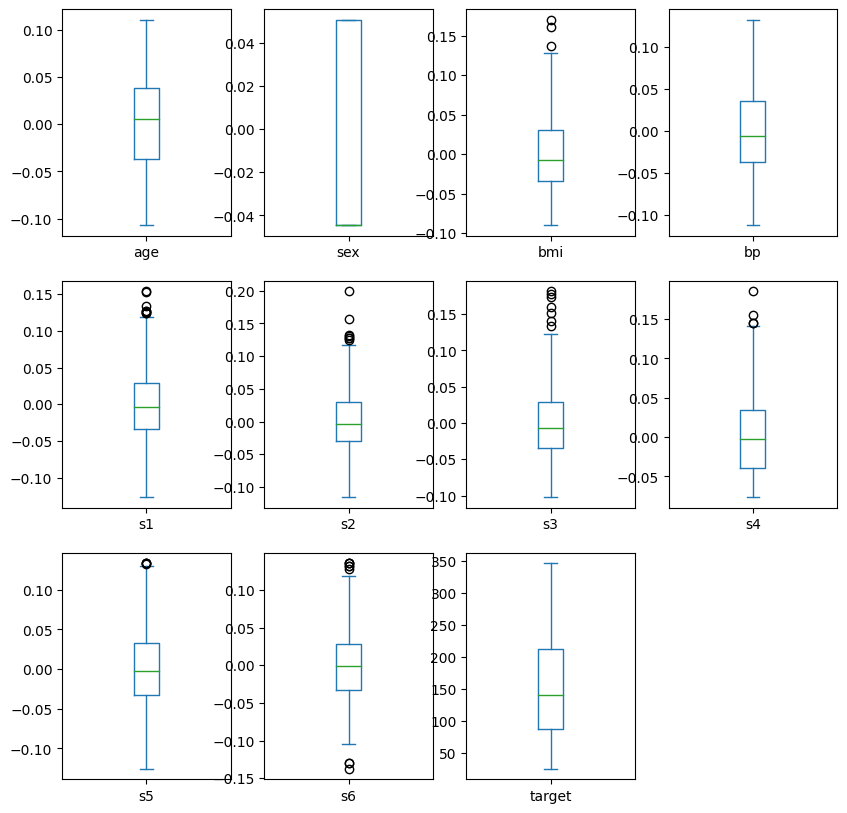

In [20]:
# 컬럼별 이상치 확인
# 단, 이상치를 처리한다고 해서 무조건 성능이 좋아지는건 아님!
df.plot(kind='box', figsize=(10, 10), subplots=True, layout=(3, 4))
plt.show()

In [21]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [22]:
Y # 연속형 > 회귀 모델 사용

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [23]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [24]:
# 모델 생성
model = LinearRegression() 

In [25]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

LinearRegression()

In [26]:
# 모델 평가 (R Squared)
# 학습 데이터와 평가 데이터 간 차이가 조금 있지만, 그것보다 성능 자체가 낮아서 과소적합이라고 판단할 수 있다.
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.555437148935302
평가 데이터 성능 : 0.35940090989715545


In [27]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([241.84730258, 250.12303941, 164.96456549, 119.11639346,
       188.23120303, 260.56079379, 113.07583812, 190.54117538,
       151.8883747 , 236.50848375, 168.76844138, 180.52719713,
       109.16037049,  90.20148392, 244.73990469,  90.58113696,
       152.51268196,  66.97735025,  98.0467335 , 215.39557064,
       197.70737206, 160.9176914 , 162.88584001, 158.25373793,
       202.44823294, 168.46663088, 119.87243699,  83.05669211,
       189.9839726 , 163.02279586, 177.07828326,  82.6702699 ,
       144.53204953, 146.07901596, 141.73841253, 195.18658206,
       164.18043648, 189.14768927, 128.13330927, 206.12996392,
        82.64273523, 164.94912645, 144.46057692, 182.0519825 ,
       178.41355601,  72.5504089 , 142.69750371, 140.43671531,
       121.75256103, 233.70553551, 162.07809758,  76.90270416,
       155.68916375, 156.64052259, 238.11357481, 175.75735587,
       190.82555855, 119.48230582, 131.3142863 , 172.2453037 ,
       214.44479397, 171.30900357, 156.69146772, 110.97

In [28]:
# rmse 계산
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, p_test, squared=False)

56.39325169594964

## 제출

제출을 위해 실습에 등장했던 OLS 함수를 완성하세요.

In [30]:
import numpy as np

# TODO: OLS 함수를 완성합니다.
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean()-w*x.mean()
    return w, b


x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])
w1, b1 = OLS(x1, y1)

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [31]:
import os
import json
import numpy as np

assert isinstance(w1, (float, np.float32, np.float64)), \
    "OLS 함수의 return 값 중 w가 float 값인지 확인하세요."
assert isinstance(b1, (float, np.float32, np.float64)), \
    "OLS 함수의 return 값 중 b가 float 값인지 확인하세요."

result = {
    "w": float(w1),
    "b": float(b1),
}

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 1.545 seconds
=== Message ===
제출 완료되었습니다.


0